In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from datetime import datetime,timedelta

In [3]:
##show all features
pd.set_option('display.max_columns',None)

## defined functions for EDA

In [4]:
## covert strings to integers or floats
def str_to_int(x):
    return int(''.join(x.strip().split(',')))

In [5]:
cab_data = pd.read_csv('Cab_Data.csv')
city_data = pd.read_csv('City.csv')
customer_ID = pd.read_csv('Customer_ID.csv')
transaction_ID = pd.read_csv('Transaction_ID.csv')

check NaN values

In [6]:
print(cab_data.isnull().values.any())
print(city_data.isnull().values.any())
print(customer_ID.isnull().values.any())
print(transaction_ID.isnull().values.any())

False
False
False
False


In [7]:
print(cab_data.shape)
cab_data.head()

(359392, 7)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [8]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [9]:
print(city_data.shape)
city_data.head()

(20, 3)


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [11]:
customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [12]:
customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [14]:
transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


## pre-processing cab_data

In [15]:
print(cab_data.shape)
cab_data.head()

(359392, 7)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [16]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


Time period of data is from 31/01/2016 to 31/12/2018.

1066 days in total.

In [17]:
##check repetitative values
print(cab_data['Transaction ID'].nunique())
print(cab_data['Date of Travel'].nunique())

359392
1095


In [18]:
cab_data['Date of Travel'] = cab_data['Date of Travel'] - cab_data['Date of Travel'].min()
cab_data['Date of Travel'].describe()

count    359392.000000
mean        593.067998
std         307.467197
min           0.000000
25%         326.000000
50%         617.000000
75%         861.000000
max        1094.000000
Name: Date of Travel, dtype: float64

In [19]:
cab_data['Datetime of Travel'] = cab_data['Date of Travel'].apply(timedelta) + datetime(2016,1,1)
print(cab_data['Datetime of Travel'].max())
cab_data.head()

2018-12-30 00:00:00


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02


## Combine with other three datesets

    merge with city

In [20]:
cab = pd.merge(left=cab_data,right=city_data,how='left',on='City')
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,"814,885","24,701"
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,"814,885","24,701"
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,"814,885","24,701"
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,"814,885","24,701"
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,"814,885","24,701"


    merge with transaction_ID

In [21]:
cab = pd.merge(cab,transaction_ID,how='left',on='Transaction ID')
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users,Customer ID,Payment_Mode
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,"814,885","24,701",29290,Card
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,"814,885","24,701",27703,Card
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,"814,885","24,701",28712,Cash
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,"814,885","24,701",28020,Cash
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,"814,885","24,701",27182,Card


In [22]:
cab = pd.merge(cab,customer_ID,how='left',on='Customer ID')
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,"814,885","24,701",29290,Card,Male,28,10813
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,"814,885","24,701",27703,Card,Male,27,9237
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,"814,885","24,701",28712,Cash,Male,53,11242
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,"814,885","24,701",28020,Cash,Male,23,23327
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,"814,885","24,701",27182,Card,Male,33,8536


profit of each trasaction: price charged - cost of trip

In [23]:
cab['profit'] = cab['Price Charged'] - cab['Cost of Trip']
cab['avg profit / km'] = cab['profit']/cab['KM Travelled']
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit,avg profit / km
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,"814,885","24,701",29290,Card,Male,28,10813,57.315,1.882266
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,"814,885","24,701",27703,Card,Male,27,9237,23.666,0.826904
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,"814,885","24,701",28712,Cash,Male,53,11242,27.568,3.049558
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,"814,885","24,701",28020,Cash,Male,23,23327,25.798,0.777751
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,"814,885","24,701",27182,Card,Male,33,8536,16.844,1.929439


## break datetime into year,month and day

In [24]:
cab['Datetime of Travel'][0].weekday()

3

In [25]:
cab['Year of Travel'] = cab['Datetime of Travel'].map(lambda x:x.year)
cab['Month of Travel'] = cab['Datetime of Travel'].map(lambda x:x.month)
cab['Day of Travel'] = cab['Datetime of Travel'].map(lambda x:x.day)
cab['Weekday of Travel'] = cab['Datetime of Travel'].map(lambda x:x.weekday())
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit,avg profit / km,Year of Travel,Month of Travel,Day of Travel,Weekday of Travel
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,"814,885","24,701",29290,Card,Male,28,10813,57.315,1.882266,2016,1,7,3
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,"814,885","24,701",27703,Card,Male,27,9237,23.666,0.826904,2016,1,5,1
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,"814,885","24,701",28712,Cash,Male,53,11242,27.568,3.049558,2016,1,1,4
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,"814,885","24,701",28020,Cash,Male,23,23327,25.798,0.777751,2016,1,6,2
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,"814,885","24,701",27182,Card,Male,33,8536,16.844,1.929439,2016,1,2,5


## profit, total rides and profit per ride

Which company has more rides and profits over the three years? Are the profits always positive?

In [26]:
print('Total profit of two companys: {}'.format(cab.groupby('Company')['profit'].sum()))
print('\n')
print('Total rides of two companys: {}'.format(cab.groupby('Company')['profit'].count()))
print('\n')
print(cab.groupby('Company')['profit'].sum()[0]/cab.groupby('Company')['profit'].count()[0])
print(cab.groupby('Company')['profit'].sum()[1]/cab.groupby('Company')['profit'].count()[1])

Total profit of two companys: Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: profit, dtype: float64


Total rides of two companys: Company
Pink Cab       84711
Yellow Cab    274681
Name: profit, dtype: int64


62.652174109619416
160.25998584102985


Some rides are negative (lose money)

In [27]:
cab_total_profit_yearly = pd.DataFrame(cab.groupby(['Year of Travel','Company'])['profit'].sum())
cab_total_profit_yearly = cab_total_profit_yearly.reset_index()
cab_total_profit_yearly

,Year of Travel,Company,profit
0,2016,Pink Cab,1.739883e+06
1,2016,Yellow Cab,1.407389e+07
2,2017,Pink Cab,2.015101e+06
3,2017,Yellow Cab,1.646427e+07
4,2018,Pink Cab,1.552345e+06
5,2018,Yellow Cab,1.348222e+07


## total annual profit of each company

[Text(0, 0.5, 'Total Annual Profit')]

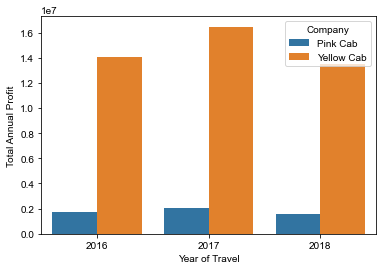

In [28]:
ax = sns.barplot(data = cab_total_profit_yearly,x = 'Year of Travel',y = 'profit',hue='Company')
sns.set(rc={'figure.figsize':(12,6)})
ax.set(ylabel = 'Total Annual Profit')

## Percentage of positive profit of each company

Mostly both companys are profitting. However, Yellow Cab company has more profitable rides than Pink Cab (inpercentage).

In [29]:
cab_profit_pos = cab[cab['profit']>0].groupby(['Year of Travel','Company'])['profit'].count()/cab.groupby(['Year of Travel','Company'])['profit'].count()*100
cab_profit_pos = pd.DataFrame(cab_profit_pos)
cab_profit_pos = cab_profit_pos.reset_index()
cab_profit_pos

,Year of Travel,Company,profit
0,2016,Pink Cab,87.170259
1,2016,Yellow Cab,95.306076
2,2017,Pink Cab,85.548750
3,2017,Yellow Cab,94.778997
4,2018,Pink Cab,87.947024
5,2018,Yellow Cab,95.004522


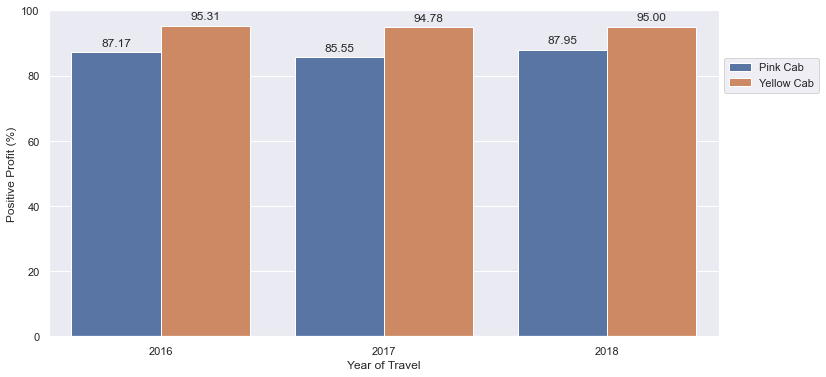

In [30]:
ax = sns.barplot(data = cab_profit_pos,x = 'Year of Travel',y = 'profit',hue = 'Company',)
sns.set(rc={'figure.figsize':(12,8)})
ax.set(ylabel = 'Positive Profit (%)')
ax.legend(loc='center left',bbox_to_anchor=(1.0,0.8))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

## Average annual profit per KM

The average profit per kilometer: Yellow Cab > Pink Cab. Implying Yellow Cab has higher returns than the Pink Cab given the same investment.

In [31]:
cab_avg_profit_km = cab.groupby(['Year of Travel','Company'])['avg profit / km'].mean()
cab_avg_profit_km = pd.DataFrame(cab_avg_profit_km)
cab_avg_profit_km = cab_avg_profit_km.reset_index()
cab_avg_profit_km

,Year of Travel,Company,avg profit / km
0,2016,Pink Cab,3.045984
1,2016,Yellow Cab,7.505961
2,2017,Pink Cab,2.948888
3,2017,Yellow Cab,7.476486
4,2018,Pink Cab,2.346011
5,2018,Yellow Cab,6.366253


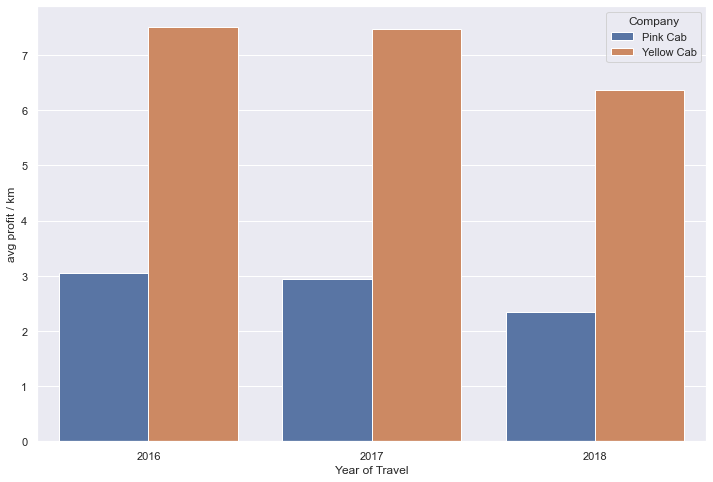

In [32]:
ax = sns.barplot(data = cab_avg_profit_km,x = 'Year of Travel',y = 'avg profit / km',hue = 'Company')

## positive profit per ride across 19 cities

Seems like in most cities, yellow cab has higher rate of positive profit than pink cab.

In [33]:
cab_profit_pos_city = cab[cab['profit']>0].groupby(['Company','City'])['profit'].count()/cab.groupby(['Company','City'])['profit'].count()
cab_profit_pos_city = pd.DataFrame(cab_profit_pos_city)
cab_profit_pos_city = cab_profit_pos_city.reset_index()
cab_profit_pos_city.head()

,Company,City,profit
0,Pink Cab,ATLANTA GA,0.842792
1,Pink Cab,AUSTIN TX,0.920236
2,Pink Cab,BOSTON MA,0.858465
3,Pink Cab,CHICAGO IL,0.764341
4,Pink Cab,DALLAS TX,0.607971


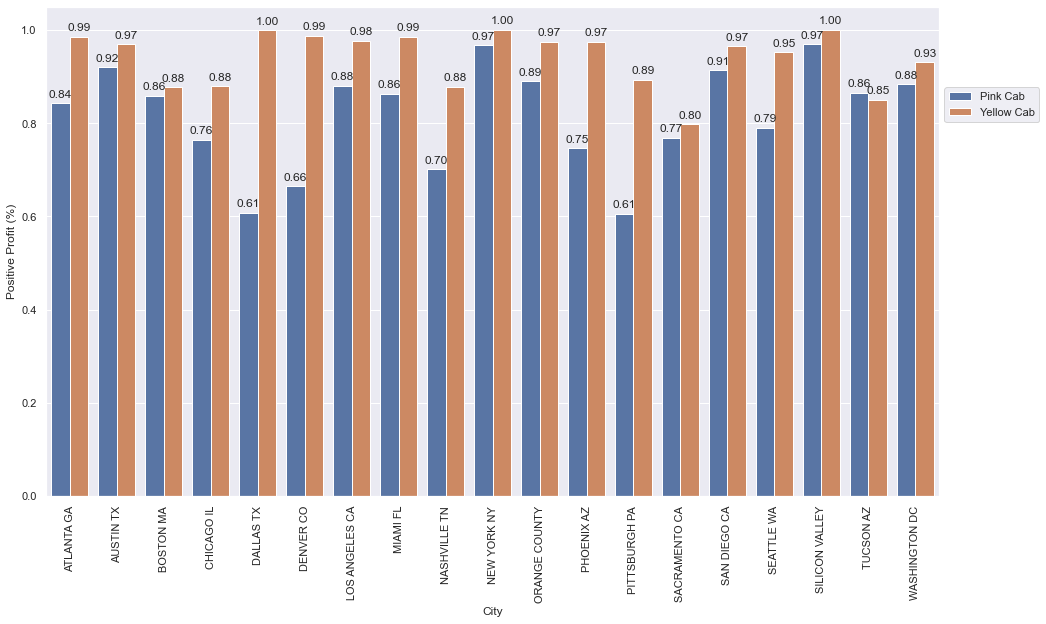

In [34]:
plt.figure(figsize = (16,9))
ax = sns.barplot(data = cab_profit_pos_city,x = 'City',y = 'profit',hue = 'Company')
ax.set(ylabel = 'Positive Profit (%)')
ax.legend(loc='center left',bbox_to_anchor=(1.0,0.8))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

## which company has max cab users at different time period?

Yellow cab reach more customers than pink cab.

In [36]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit,avg profit / km,Year of Travel,Month of Travel,Day of Travel,Weekday of Travel
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,"814,885","24,701",29290,Card,Male,28,10813,57.315,1.882266,2016,1,7,3
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,"814,885","24,701",27703,Card,Male,27,9237,23.666,0.826904,2016,1,5,1
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,"814,885","24,701",28712,Cash,Male,53,11242,27.568,3.049558,2016,1,1,4
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,"814,885","24,701",28020,Cash,Male,23,23327,25.798,0.777751,2016,1,6,2
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,"814,885","24,701",27182,Card,Male,33,8536,16.844,1.929439,2016,1,2,5


number of customers per year per company

In [37]:
cab_customer_year = pd.DataFrame(cab.groupby(['Year of Travel','Company'])['Customer ID'].nunique())
cab_customer_year = cab_customer_year.reset_index()
cab_customer_year.head()

,Year of Travel,Company,Customer ID
0,2016,Pink Cab,16751
1,2016,Yellow Cab,26043
2,2017,Pink Cab,18582
3,2017,Yellow Cab,27749
4,2018,Pink Cab,18361


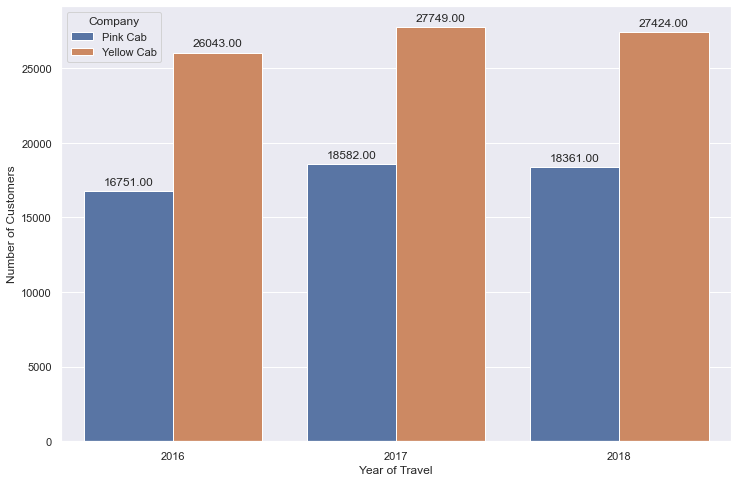

In [38]:
ax = sns.barplot(data = cab_customer_year,x = 'Year of Travel',y = 'Customer ID',hue = 'Company')
ax.set(ylabel = 'Number of Customers')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Customer reach: % of total customers have been covered by two companys

## note: we need to change datatype: users and population from object to int

Again, user coverage of yellow cab is higher than pink cab

In [40]:
cab['Users'] = cab['Users'].apply(str_to_int)
cab['Population'] = cab['Population'].apply(str_to_int)

In [48]:
cab_user_reach = pd.DataFrame(cab.groupby(['Company'])['Customer ID'].nunique()/cab['Users'].unique().sum()*100)
cab_user_reach = cab_user_reach.reset_index()
cab_user_reach.head()

,Company,Customer ID
0,Pink Cab,3.002403
1,Yellow Cab,3.705038


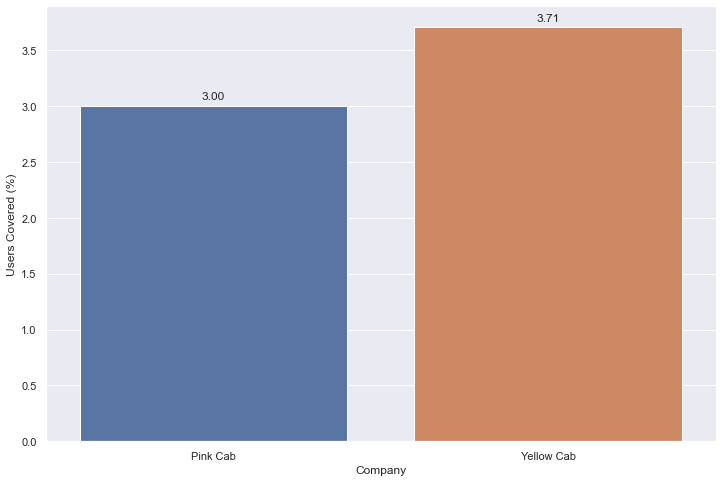

In [50]:
ax = sns.barplot(data = cab_user_reach,x = 'Company',y = 'Customer ID')
ax.set(ylabel = 'Users Covered (%)')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

## Number of customers have been reached by two companys for each city

For most cities, yellow cab has reached more customers than pink cab, despite four cities: NASHVILLE TN, PITTSBURGH PA, SACRAMENTO CA, SAN DIEGO CA.

In [52]:
cab_user_reach_city = pd.DataFrame(cab.groupby(['City','Company'])['Customer ID'].nunique())
cab_user_reach_city = cab_user_reach_city.reset_index()
cab_user_reach_city.head()

,City,Company,Customer ID
0,ATLANTA GA,Pink Cab,1322
1,ATLANTA GA,Yellow Cab,2595
2,AUSTIN TX,Pink Cab,1354
3,AUSTIN TX,Yellow Cab,1914
4,BOSTON MA,Pink Cab,2463


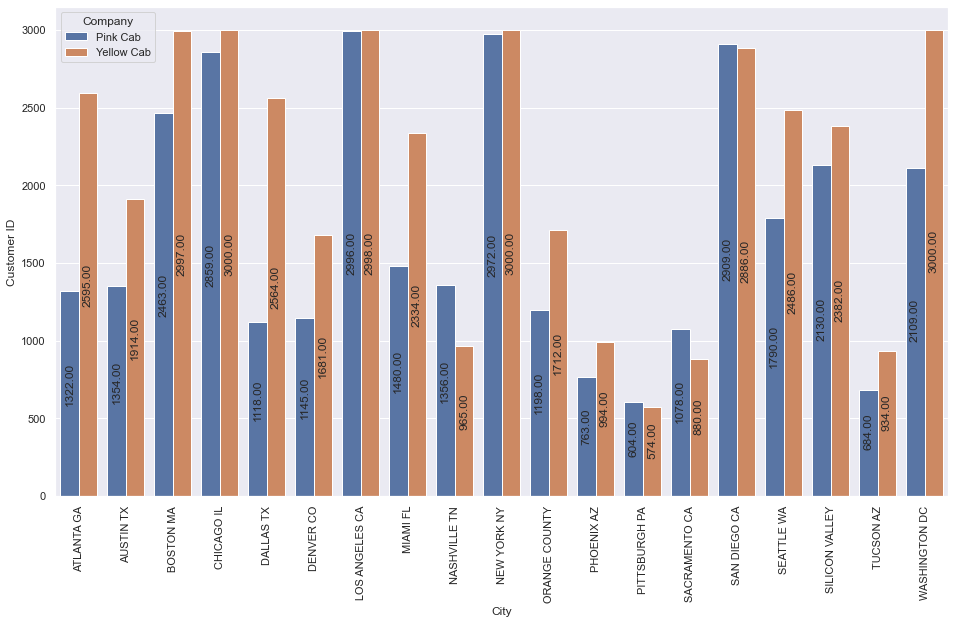

In [59]:
plt.figure(figsize = (16,9))
ax = sns.barplot(data = cab_user_reach_city,x = 'City',y = 'Customer ID',hue = 'Company')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_x() + p.get_height() / 2.), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',rotation = 90)

## Customer retention

People using yellow cab with more than 5 rides annual is higher than pink cab; it is even more significant for people taking rides more tahn 10 times per year. Meaning that yellow cab has significnat better customer retention.

In [65]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit,avg profit / km,Year of Travel,Month of Travel,Day of Travel,Weekday of Travel
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,814885,24701,29290,Card,Male,28,10813,57.315,1.882266,2016,1,7,3
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,814885,24701,27703,Card,Male,27,9237,23.666,0.826904,2016,1,5,1
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,814885,24701,28712,Cash,Male,53,11242,27.568,3.049558,2016,1,1,4
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,814885,24701,28020,Cash,Male,23,23327,25.798,0.777751,2016,1,6,2
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,814885,24701,27182,Card,Male,33,8536,16.844,1.929439,2016,1,2,5


In [89]:
##customers who have taken rides > 5 for each company in each year
cab_user_retention = pd.DataFrame(cab.groupby(['Year of Travel','Company'])['Customer ID'].value_counts())
cab_user_retention.rename(columns={'Customer ID':'freq'},inplace=True)

In [91]:
cab_user_retention = cab_user_retention.reset_index()
cab_user_retention

,Year of Travel,Company,Customer ID,freq
0,2016,Pink Cab,6416,10
1,2016,Pink Cab,6228,9
2,2016,Pink Cab,7927,8
3,2016,Pink Cab,8161,8
4,2016,Pink Cab,1060,7
...,...,...,...,...
134905,2018,Yellow Cab,59970,1
134906,2018,Yellow Cab,59975,1
134907,2018,Yellow Cab,59979,1
134908,2018,Yellow Cab,59984,1


In [98]:
cab_over_5 = pd.DataFrame(cab_user_retention[cab_user_retention['freq']>=5].groupby(['Year of Travel','Company'])['freq'].nunique())
cab_over_5 = cab_over_5.reset_index()
cab_over_5

,Year of Travel,Company,freq
0,2016,Pink Cab,6
1,2016,Yellow Cab,15
2,2017,Pink Cab,8
3,2017,Yellow Cab,19
4,2018,Pink Cab,4
5,2018,Yellow Cab,18


In [99]:
cab_over_10 = pd.DataFrame(cab_user_retention[cab_user_retention['freq']>=10].groupby(['Year of Travel','Company'])['freq'].nunique())
cab_over_10 = cab_over_10.reset_index()
cab_over_10

,Year of Travel,Company,freq
0,2016,Pink Cab,1
1,2016,Yellow Cab,10
2,2017,Pink Cab,3
3,2017,Yellow Cab,14
4,2018,Yellow Cab,13


Text(0.5, 1.0, 'At least 10 rides')

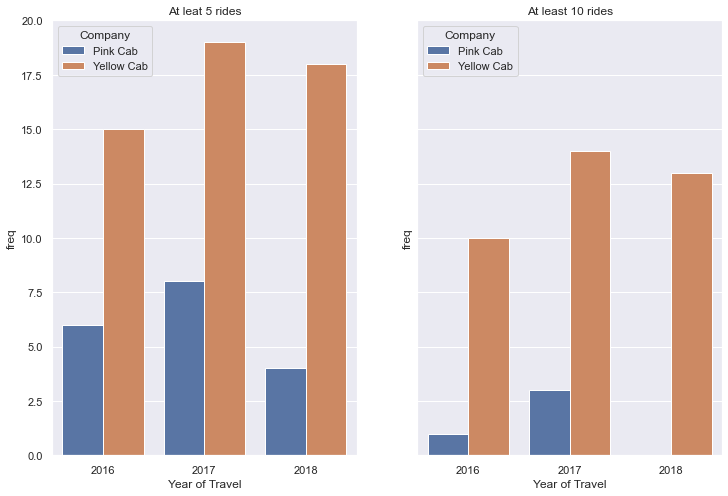

In [110]:
fig,ax = plt.subplots(1,2,sharey = True)
plt.ylim([0,20])
sns.barplot(data = cab_over_5,x = 'Year of Travel',y = 'freq',hue = 'Company',ax = ax[0])
sns.barplot(data = cab_over_10,x = 'Year of Travel',y = 'freq',hue = 'Company',ax = ax[1])
ax[0].set_title('At leat 5 rides')
ax[1].set_title('At least 10 rides')

## effect of gender, age group, income class, and payment mode

(1) both companys have more male customers than females;
(2) it is 24-60 age group contributing more profits than other groups, while 60+ group contributes the least, whcih is consistent with customers age segment results (nearly 50%);
(3) monthly income less than $2500 contributes profit less than 2%, which is reasonable;
(4) slightly more people prefer to use card payment than cash.

In [111]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit,avg profit / km,Year of Travel,Month of Travel,Day of Travel,Weekday of Travel
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,814885,24701,29290,Card,Male,28,10813,57.315,1.882266,2016,1,7,3
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,814885,24701,27703,Card,Male,27,9237,23.666,0.826904,2016,1,5,1
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,814885,24701,28712,Cash,Male,53,11242,27.568,3.049558,2016,1,1,4
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,814885,24701,28020,Cash,Male,23,23327,25.798,0.777751,2016,1,6,2
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,814885,24701,27182,Card,Male,33,8536,16.844,1.929439,2016,1,2,5


In [118]:
cab_gender_profit = pd.DataFrame(cab.groupby(['Year of Travel','Company','Gender'])['profit'].sum()/cab.groupby(['Year of Travel','Company'])['profit'].sum()*100)
cab_gender_profit = cab_gender_profit.reset_index()
cab_gender_profit

,Year of Travel,Company,Gender,profit
0,2016,Pink Cab,Female,43.020890
1,2016,Pink Cab,Male,56.979110
2,2016,Yellow Cab,Female,40.109061
3,2016,Yellow Cab,Male,59.890939
4,2017,Pink Cab,Female,44.052282
5,2017,Pink Cab,Male,55.947718
6,2017,Yellow Cab,Female,41.629177
7,2017,Yellow Cab,Male,58.370823
8,2018,Pink Cab,Female,44.727290
9,2018,Pink Cab,Male,55.272710


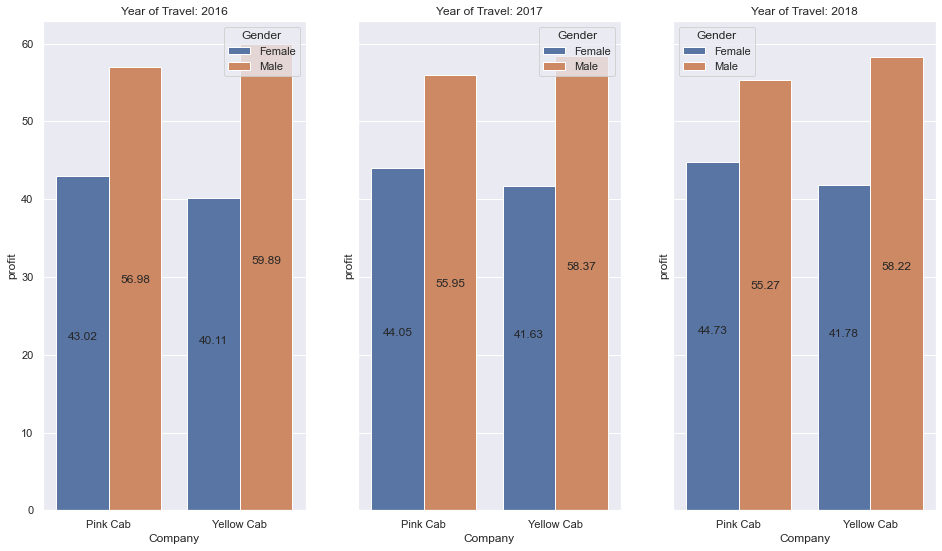

In [147]:
fig,ax = plt.subplots(1,3,sharey = True,figsize = (16,9),)
# sns.barplot(data = cab_gender_profit[cab_gender_profit['Year of Travel']==2016],x = 'Company',y = 'profit',hue = 'Gender',ax = ax[0])
for i in range(0,3):
    sns.barplot(data = cab_gender_profit[cab_gender_profit['Year of Travel']==2016+i],x = 'Company',y = 'profit',hue = 'Gender',ax = ax[i])
    ax[i].set_title('Year of Travel: {}'.format(2016+i))
    
    for p in ax[i].patches:
        ax[i].annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_x() + p.get_height() / 2.), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

customer base by gender

In [159]:
cab_gender_customer_base = pd.DataFrame(cab.groupby(['Year of Travel','Company','Gender'])['Customer ID'].nunique()/cab.groupby(['Year of Travel','Company'])['Customer ID'].nunique()*100)
cab_gender_customer_base = cab_gender_customer_base.reset_index()
cab_gender_customer_base

,Year of Travel,Company,Gender,Customer ID
0,2016,Pink Cab,Female,44.158558
1,2016,Pink Cab,Male,55.841442
2,2016,Yellow Cab,Female,44.422686
3,2016,Yellow Cab,Male,55.577314
4,2017,Pink Cab,Female,45.172748
5,2017,Pink Cab,Male,54.827252
6,2017,Yellow Cab,Female,45.244874
7,2017,Yellow Cab,Male,54.755126
8,2018,Pink Cab,Female,45.400577
9,2018,Pink Cab,Male,54.599423


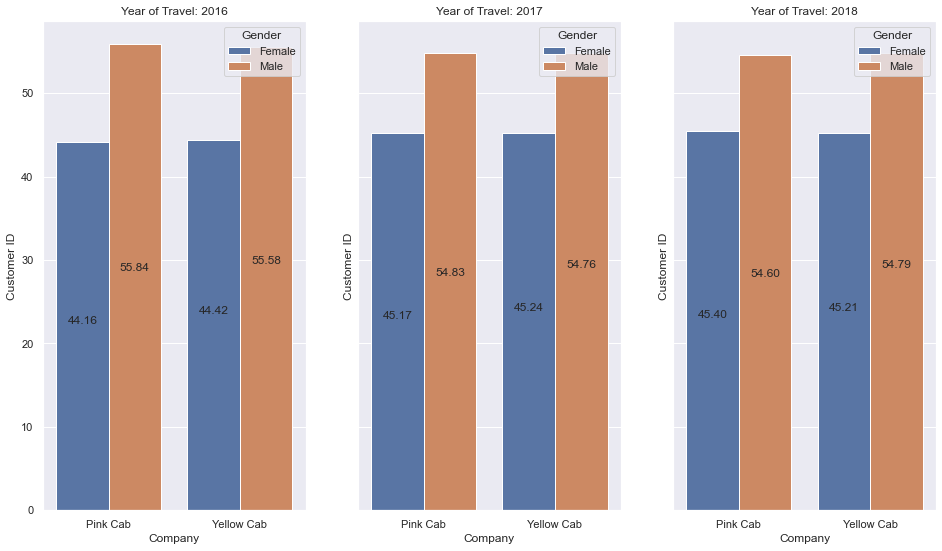

In [164]:
fig,ax = plt.subplots(1,3,sharey = True,figsize = (16,9),)
# sns.barplot(data = cab_gender_profit[cab_gender_profit['Year of Travel']==2016],x = 'Company',y = 'profit',hue = 'Gender',ax = ax[0])
for i in range(0,3):
    sns.barplot(data = cab_gender_customer_base[cab_gender_customer_base['Year of Travel']==2016+i],x = 'Company',y = 'Customer ID',hue = 'Gender',ax = ax[i])
    ax[i].set_title('Year of Travel: {}'.format(2016+i))
    
    for p in ax[i].patches:
        ax[i].annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_x() + p.get_height() / 2.), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [156]:
np.sort(cab['Age'].unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
      dtype=int64)

age groups, add reference from Internet

(1) children: 0-14
(2) youth: 15-24
(3) adults: 25-64
(4) seniors: 65 or older

However, we use: 18-25, 26-40, 41-60, 60+

In [194]:
age_range = [17,25,40,60,100]
age_labels = ['18-25','26-40','41-60','60+']
cab_age  =cab.copy()
cab_age['age_group'] = pd.cut(cab['Age'],age_range,labels=age_labels)
cab_age.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit,avg profit / km,Year of Travel,Month of Travel,Day of Travel,Weekday of Travel,age_group
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,814885,24701,29290,Card,Male,28,10813,57.315,1.882266,2016,1,7,3,26-40
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,814885,24701,27703,Card,Male,27,9237,23.666,0.826904,2016,1,5,1,26-40
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,814885,24701,28712,Cash,Male,53,11242,27.568,3.049558,2016,1,1,4,41-60
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,814885,24701,28020,Cash,Male,23,23327,25.798,0.777751,2016,1,6,2,18-25
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,814885,24701,27182,Card,Male,33,8536,16.844,1.929439,2016,1,2,5,26-40


In [195]:
cab_age['age_group'].unique()

['26-40', '41-60', '18-25', '60+']
Categories (4, object): ['18-25' < '26-40' < '41-60' < '60+']

In [203]:
cab_age_profit = pd.DataFrame(cab_age.groupby(['Year of Travel','Company','age_group'])['profit'].sum())
cab_age_profit = cab_age_profit.reset_index()
cab_age_profit.head()

,Year of Travel,Company,age_group,profit
0,2016,Pink Cab,18-25,4.472878e+05
1,2016,Pink Cab,26-40,8.247830e+05
2,2016,Pink Cab,41-60,3.713465e+05
3,2016,Pink Cab,60+,9.646534e+04
4,2016,Yellow Cab,18-25,3.638693e+06


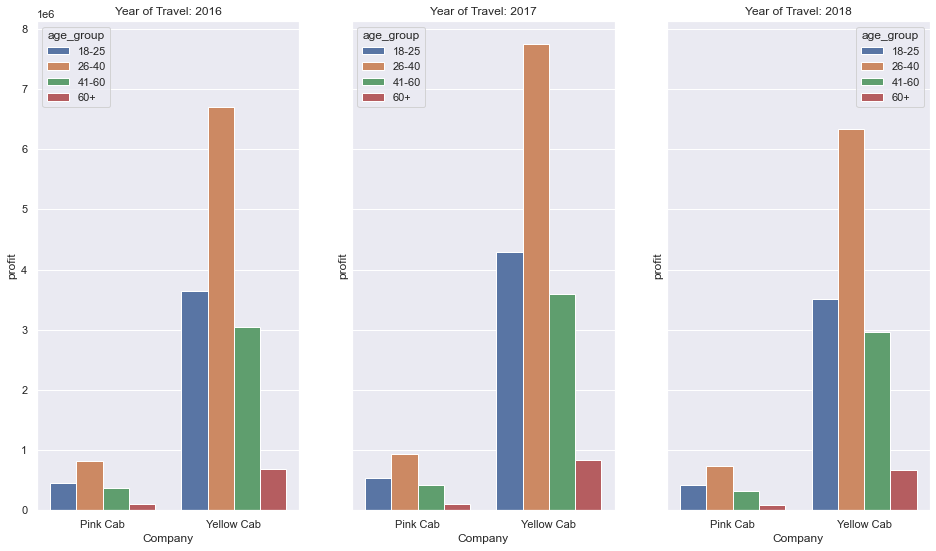

In [206]:
fig,ax = plt.subplots(1,3,sharey = True,figsize = (16,9),)
# sns.barplot(data = cab_gender_profit[cab_gender_profit['Year of Travel']==2016],x = 'Company',y = 'profit',hue = 'Gender',ax = ax[0])
for i in range(0,3):
    sns.barplot(data = cab_age_profit[cab_age_profit['Year of Travel']==2016+i],x = 'Company',y = 'profit',hue = 'age_group',ax = ax[i])
    ax[i].set_title('Year of Travel: {}'.format(2016+i))

Text(0.5, 1.0, 'Yellow Cab')

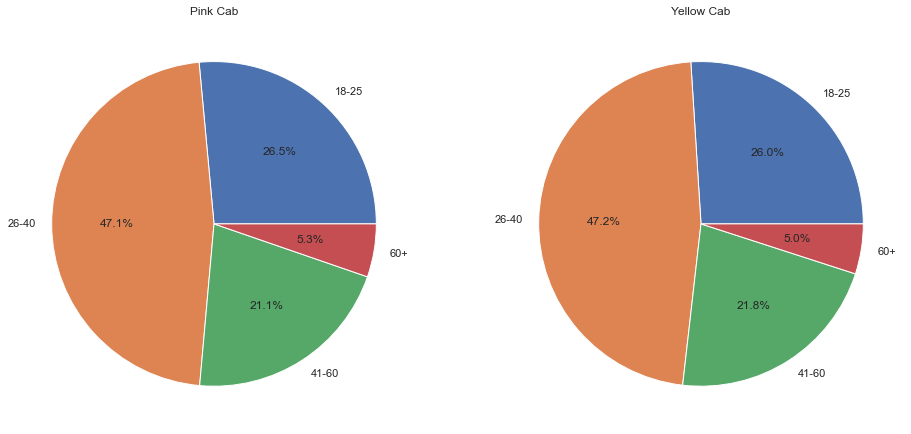

In [241]:
cab_age_profit = pd.DataFrame(cab_age.groupby(['Company','age_group'])['profit'].sum())
cab_age_profit = cab_age_profit.reset_index()

fig,ax = plt.subplots(1,2,figsize = (16,9))
ax[0].pie(cab_age_profit[cab_age_profit['Company']=='Pink Cab']['profit'],labels=age_labels,autopct='%.1f%%')
ax[0].set_title('Pink Cab')
ax[1].pie(cab_age_profit[cab_age_profit['Company']=='Yellow Cab']['profit'],labels=age_labels,autopct='%.1f%%')
ax[1].set_title('Yellow Cab')

In [207]:
cab_age_customer = pd.DataFrame(cab_age.groupby(['Year of Travel','Company','age_group'])['Customer ID'].nunique())
cab_age_customer = cab_age_customer.reset_index()
cab_age_customer.head()

,Year of Travel,Company,age_group,Customer ID
0,2016,Pink Cab,18-25,4326
1,2016,Pink Cab,26-40,7936
2,2016,Pink Cab,41-60,3570
3,2016,Pink Cab,60+,919
4,2016,Yellow Cab,18-25,6715


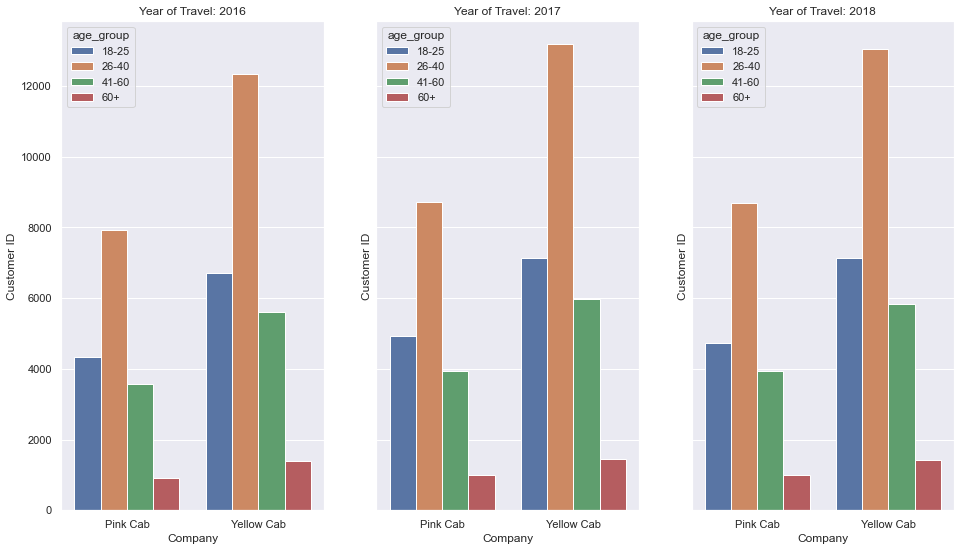

In [210]:
fig,ax = plt.subplots(1,3,sharey = True,figsize = (16,9),)
# sns.barplot(data = cab_gender_profit[cab_gender_profit['Year of Travel']==2016],x = 'Company',y = 'profit',hue = 'Gender',ax = ax[0])
for i in range(0,3):
    sns.barplot(data = cab_age_customer[cab_age_customer['Year of Travel']==2016+i],x = 'Company',y = 'Customer ID',hue = 'age_group',ax = ax[i])
    ax[i].set_title('Year of Travel: {}'.format(2016+i))

Text(0.5, 1.0, 'Yellow Cab')

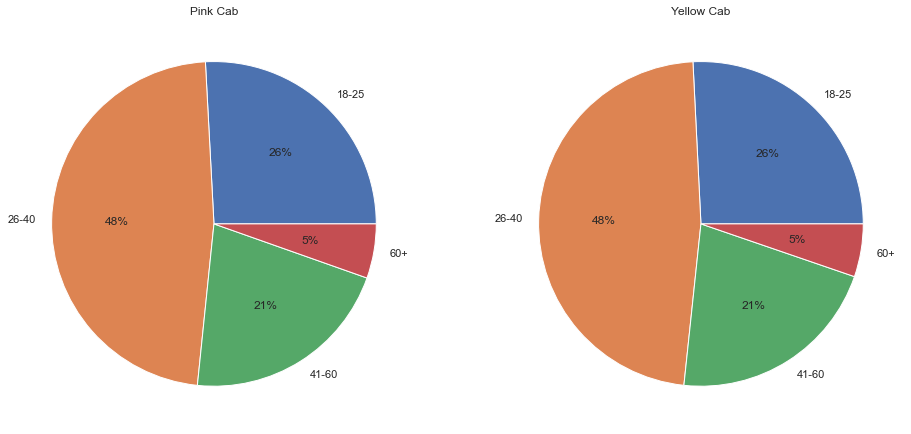

In [239]:
cab_age_customer = pd.DataFrame(cab_age.groupby(['Company','age_group'])['Customer ID'].nunique())
cab_age_customer = cab_age_customer.reset_index()

fig,ax = plt.subplots(1,2,figsize = (16,9))
ax[0].pie(cab_age_customer[cab_age_customer['Company']=='Pink Cab']['Customer ID'],labels=age_labels,autopct='%.0f%%')
ax[0].set_title('Pink Cab')
ax[1].pie(cab_age_customer[cab_age_customer['Company']=='Yellow Cab']['Customer ID'],labels=age_labels,autopct='%.0f%%')
ax[1].set_title('Yellow Cab')

in come class: 
<2500; 2500-15000; >15000

In [214]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit,avg profit / km,Year of Travel,Month of Travel,Day of Travel,Weekday of Travel
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,814885,24701,29290,Card,Male,28,10813,57.315,1.882266,2016,1,7,3
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,814885,24701,27703,Card,Male,27,9237,23.666,0.826904,2016,1,5,1
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,814885,24701,28712,Cash,Male,53,11242,27.568,3.049558,2016,1,1,4
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,814885,24701,28020,Cash,Male,23,23327,25.798,0.777751,2016,1,6,2
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,814885,24701,27182,Card,Male,33,8536,16.844,1.929439,2016,1,2,5


In [218]:
income_class = [0,2500,15000,1e+6]
income_class_label = ['<2500','2500-15000','>15000']
cab_income = cab.copy()
cab_income['income class'] = pd.cut(cab['Income (USD/Month)'],income_class,labels=income_class_label)
cab_income.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit,avg profit / km,Year of Travel,Month of Travel,Day of Travel,Weekday of Travel,income class
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,814885,24701,29290,Card,Male,28,10813,57.315,1.882266,2016,1,7,3,2500-15000
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,814885,24701,27703,Card,Male,27,9237,23.666,0.826904,2016,1,5,1,2500-15000
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,814885,24701,28712,Cash,Male,53,11242,27.568,3.049558,2016,1,1,4,2500-15000
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,814885,24701,28020,Cash,Male,23,23327,25.798,0.777751,2016,1,6,2,>15000
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,814885,24701,27182,Card,Male,33,8536,16.844,1.929439,2016,1,2,5,2500-15000


In [222]:
cab_income_profit = pd.DataFrame(cab_income.groupby(['Year of Travel','Company','income class'])['profit'].sum())
cab_income_profit = cab_income_profit.reset_index()

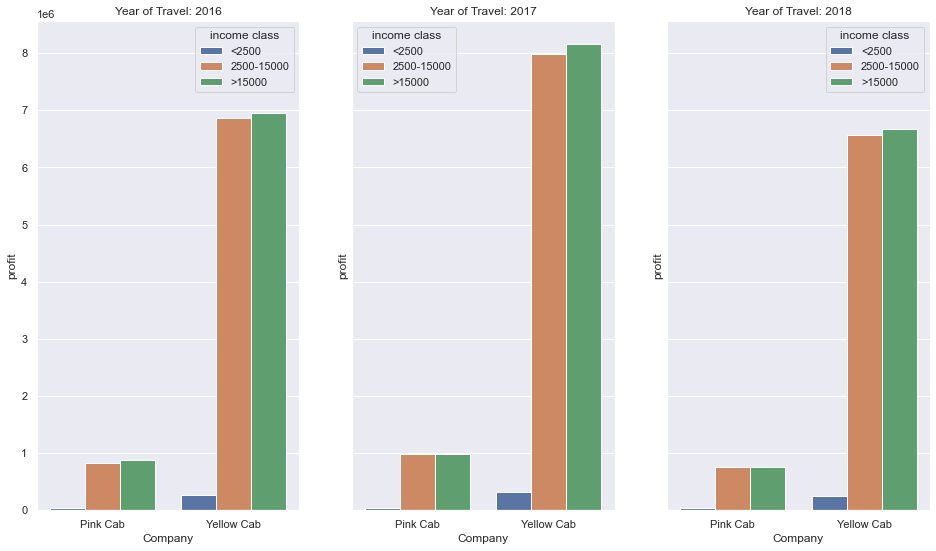

In [223]:
fig,ax = plt.subplots(1,3,sharey = True,figsize = (16,9),)
# sns.barplot(data = cab_gender_profit[cab_gender_profit['Year of Travel']==2016],x = 'Company',y = 'profit',hue = 'Gender',ax = ax[0])
for i in range(0,3):
    sns.barplot(data = cab_income_profit[cab_income_profit['Year of Travel']==2016+i],x = 'Company',y = 'profit',hue = 'income class',ax = ax[i])
    ax[i].set_title('Year of Travel: {}'.format(2016+i))

Text(0.5, 1.0, 'Yellow Cab')

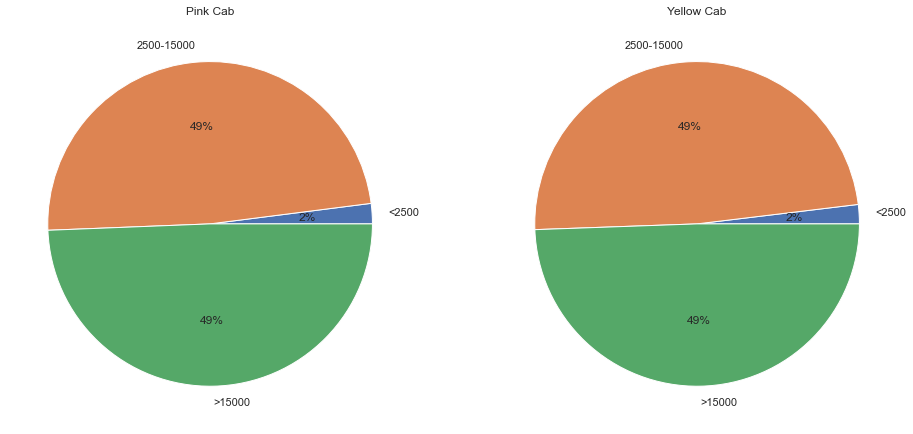

In [235]:
cab_income_profit = pd.DataFrame(cab_income.groupby(['Company','income class'])['profit'].sum())
cab_income_profit = cab_income_profit.reset_index()
cab_income_profit

fig,ax = plt.subplots(1,2,figsize = (16,9))
ax[0].pie(cab_income_profit[cab_income_profit['Company']=='Pink Cab']['profit'],labels=income_class_label,autopct='%.0f%%')
ax[0].set_title('Pink Cab')
ax[1].pie(cab_income_profit[cab_income_profit['Company']=='Yellow Cab']['profit'],labels=income_class_label,autopct='%.0f%%')
ax[1].set_title('Yellow Cab')

Text(0.5, 1.0, 'Yellow Cab')

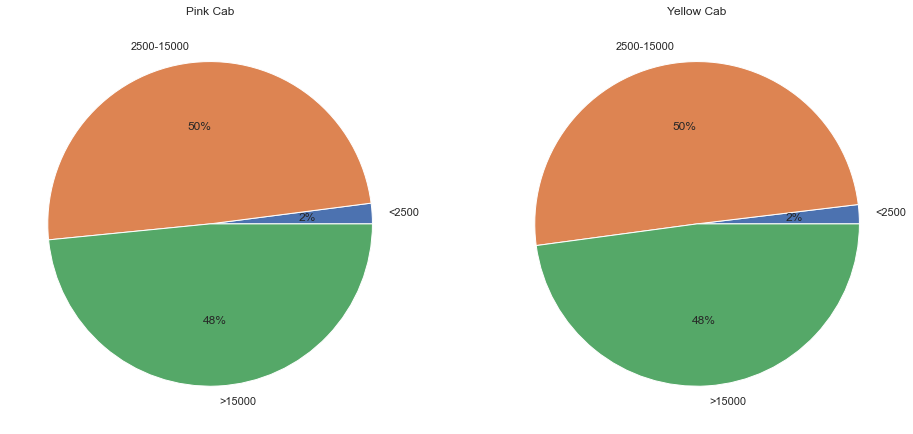

In [237]:
cab_income_customer = pd.DataFrame(cab_income.groupby(['Company','income class'])['Customer ID'].sum())
cab_income_customer = cab_income_customer.reset_index()
cab_income_customer

fig,ax = plt.subplots(1,2,figsize = (16,9))
ax[0].pie(cab_income_customer[cab_income_customer['Company']=='Pink Cab']['Customer ID'],labels=income_class_label,autopct='%.0f%%')
ax[0].set_title('Pink Cab')
ax[1].pie(cab_income_customer[cab_income_customer['Company']=='Yellow Cab']['Customer ID'],labels=income_class_label,autopct='%.0f%%')
ax[1].set_title('Yellow Cab')

In [247]:
cab['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

Text(0.5, 1.0, 'Yellow Cab')

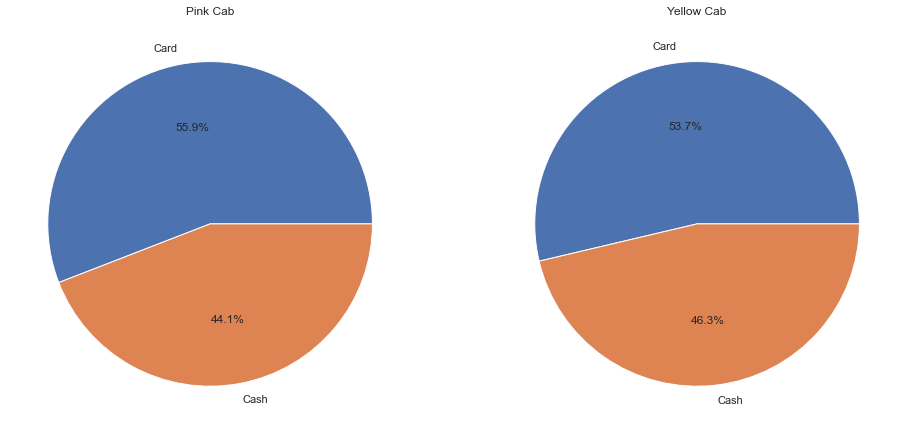

In [249]:
## payment mode (vs age? vs company? vs income? vs gender? vs city?)
pay_method = ['Card','Cash']

cab_payment_company = pd.DataFrame(cab.groupby(['Company','Payment_Mode'])['Customer ID'].nunique())
cab_payment_company = cab_payment_company.reset_index()
cab_payment_company.head()

fig,ax = plt.subplots(1,2,figsize = (16,9))
ax[0].pie(cab_payment_company[cab_payment_company['Company']=='Pink Cab']['Customer ID'],labels=pay_method,autopct='%.1f%%')
ax[0].set_title('Pink Cab')
ax[1].pie(cab_payment_company[cab_payment_company['Company']=='Yellow Cab']['Customer ID'],labels=pay_method,autopct='%.1f%%')
ax[1].set_title('Yellow Cab')

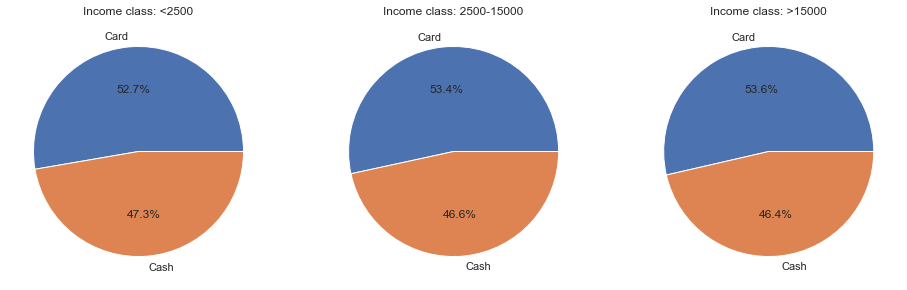

In [265]:
##vs income class
cab_payment_income = pd.DataFrame(cab_income.groupby(['income class','Payment_Mode'])['Customer ID'].nunique())
cab_payment_income = cab_payment_income.reset_index()
cab_payment_income

fig,ax = plt.subplots(1,3,figsize = (16,9))
for i,income in enumerate(cab_payment_income['income class'].unique()):
    ax[i].pie(cab_payment_income[cab_payment_income['income class']==income]['Customer ID'],labels=pay_method,autopct='%.1f%%')
    ax[i].set_title('Income class: {}'.format(income))

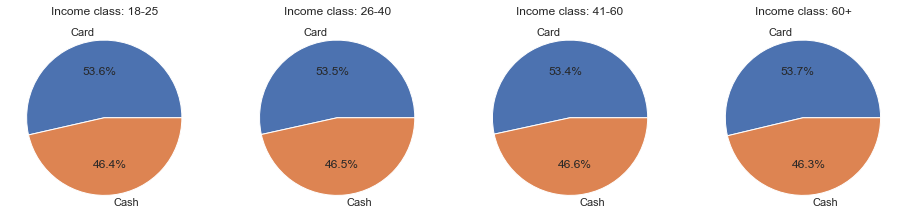

In [278]:
##vs age
cab_payment_age = pd.DataFrame(cab_age.groupby(['age_group','Payment_Mode'])['Customer ID'].nunique())
cab_payment_age = cab_payment_age.reset_index()
cab_payment_age

fig,ax = plt.subplots(1,4,figsize = (16,9))
for i,age in enumerate(cab_payment_age['age_group'].unique()):
    ax[i].pie(cab_payment_age[cab_payment_age['age_group']==age]['Customer ID'],labels=pay_method,autopct='%.1f%%')
    ax[i].set_title('Income class: {}'.format(age))

In [279]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit,avg profit / km,Year of Travel,Month of Travel,Day of Travel,Weekday of Travel
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,814885,24701,29290,Card,Male,28,10813,57.315,1.882266,2016,1,7,3
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,814885,24701,27703,Card,Male,27,9237,23.666,0.826904,2016,1,5,1
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,814885,24701,28712,Cash,Male,53,11242,27.568,3.049558,2016,1,1,4
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,814885,24701,28020,Cash,Male,23,23327,25.798,0.777751,2016,1,6,2
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,814885,24701,27182,Card,Male,33,8536,16.844,1.929439,2016,1,2,5


## seanonality, profit change with time

(1) Seasonaly, both cabs have the best performance at the last quarter: Q4, since two important holidays: Thanksgiving and Chiristmas.
(2) for weekdays, more rides and profits are on Thursday, Firday and Saturday, which might more people choose to travel / aways office.

In [288]:
##add feature seasons
season = [0,3,6,9,12]
season_tag = ['Q1','Q2','Q3','Q4']
cab['season'] = pd.cut(cab['Month of Travel'],bins=season,labels=season_tag)
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit,avg profit / km,Year of Travel,Month of Travel,Day of Travel,Weekday of Travel,season
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,814885,24701,29290,Card,Male,28,10813,57.315,1.882266,2016,1,7,3,Q1
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,814885,24701,27703,Card,Male,27,9237,23.666,0.826904,2016,1,5,1,Q1
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,814885,24701,28712,Cash,Male,53,11242,27.568,3.049558,2016,1,1,4,Q1
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,814885,24701,28020,Cash,Male,23,23327,25.798,0.777751,2016,1,6,2,Q1
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,814885,24701,27182,Card,Male,33,8536,16.844,1.929439,2016,1,2,5,Q1


In [291]:
##profit vs seasons
cab_season = pd.DataFrame(cab.groupby(['season','Company','Year of Travel'])['profit'].sum())
cab_season = cab_season.reset_index()
cab_season.head()

,season,Company,Year of Travel,profit
0,Q1,Pink Cab,2016,2.508712e+05
1,Q1,Pink Cab,2017,3.347843e+05
2,Q1,Pink Cab,2018,3.251806e+05
3,Q1,Yellow Cab,2016,2.779208e+06
4,Q1,Yellow Cab,2017,3.481110e+06


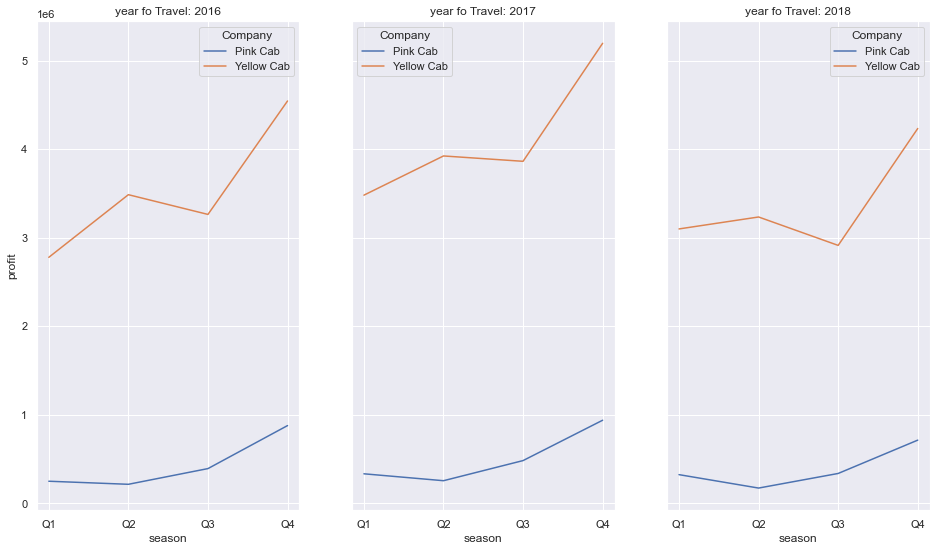

In [305]:
fig,ax = plt.subplots(1,3,figsize = (16,9),sharey=True)
for i,year in enumerate(cab_season['Year of Travel'].unique()):
    sns.lineplot(data = cab_season[cab_season['Year of Travel']==year],x = 'season',y = 'profit',hue = 'Company',ax=ax[i])
    ax[i].set_title('year fo Travel: {}'.format(year))

In [298]:
##we can also check profit versus months in entire three years
cab_month = cab.copy()
cab_month['months'] = (cab_month['Year of Travel']-2016)*12+cab_month['Month of Travel']
cab_month.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit,avg profit / km,Year of Travel,Month of Travel,Day of Travel,Weekday of Travel,season,months
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,814885,24701,29290,Card,Male,28,10813,57.315,1.882266,2016,1,7,3,Q1,1
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,814885,24701,27703,Card,Male,27,9237,23.666,0.826904,2016,1,5,1,Q1,1
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,814885,24701,28712,Cash,Male,53,11242,27.568,3.049558,2016,1,1,4,Q1,1
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,814885,24701,28020,Cash,Male,23,23327,25.798,0.777751,2016,1,6,2,Q1,1
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,814885,24701,27182,Card,Male,33,8536,16.844,1.929439,2016,1,2,5,Q1,1


In [302]:
cab_month_profit = pd.DataFrame(cab_month.groupby(['months','Company'])['profit'].sum())
cab_month_profit = cab_month_profit.reset_index()
cab_month_profit.head()

,months,Company,profit
0,1,Pink Cab,7.420617e+04
1,1,Yellow Cab,8.535861e+05
2,2,Pink Cab,8.838429e+04
3,2,Yellow Cab,1.007479e+06
4,3,Pink Cab,8.828073e+04


<AxesSubplot:xlabel='months', ylabel='profit'>

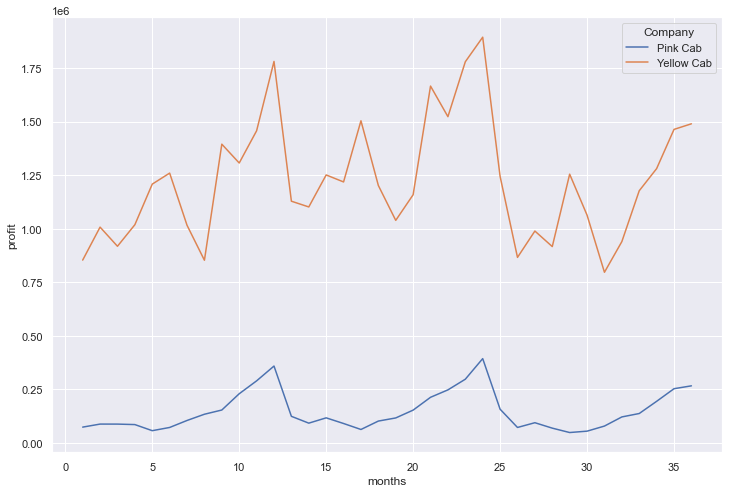

In [303]:
sns.lineplot(data=cab_month_profit,x = 'months',y = 'profit',hue = 'Company')

In [310]:
## day to day is not fun, let us check weekdays
weekday_dict = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [311]:
cab_weekday = cab.copy()
cab_weekday['Weekday of Travel'] = [weekday_dict[x] for x in cab_weekday['Weekday of Travel']]
cab_weekday.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit,avg profit / km,Year of Travel,Month of Travel,Day of Travel,Weekday of Travel,season
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,814885,24701,29290,Card,Male,28,10813,57.315,1.882266,2016,1,7,Thu,Q1
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,814885,24701,27703,Card,Male,27,9237,23.666,0.826904,2016,1,5,Tue,Q1
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,814885,24701,28712,Cash,Male,53,11242,27.568,3.049558,2016,1,1,Fri,Q1
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,814885,24701,28020,Cash,Male,23,23327,25.798,0.777751,2016,1,6,Wed,Q1
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,814885,24701,27182,Card,Male,33,8536,16.844,1.929439,2016,1,2,Sat,Q1


In [313]:
##profit
cab_weekday_profit = pd.DataFrame(cab_weekday.groupby(['Weekday of Travel','Company'])['profit'].sum())
cab_weekday_profit = cab_weekday_profit.reset_index()
cab_weekday_profit.head()

,Weekday of Travel,Company,profit
0,Fri,Pink Cab,1.235507e+06
1,Fri,Yellow Cab,1.004241e+07
2,Mon,Pink Cab,3.389255e+05
3,Mon,Yellow Cab,3.179840e+06
4,Sat,Pink Cab,1.280728e+06


[Text(0.5, 1.0, 'Profit over three years')]

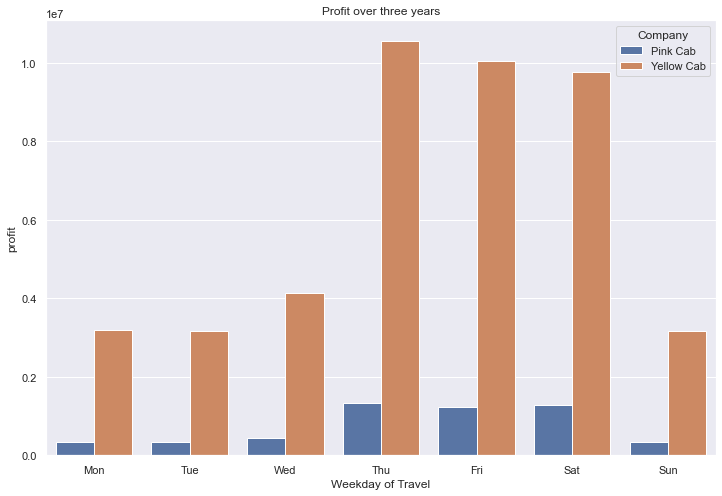

In [321]:
sns.barplot(data=cab_weekday_profit,x = 'Weekday of Travel',y = 'profit',hue='Company',order=weekday_dict.values()).set(title = 'Profit over three years')

[Text(0.5, 1.0, '# of rides over three years')]

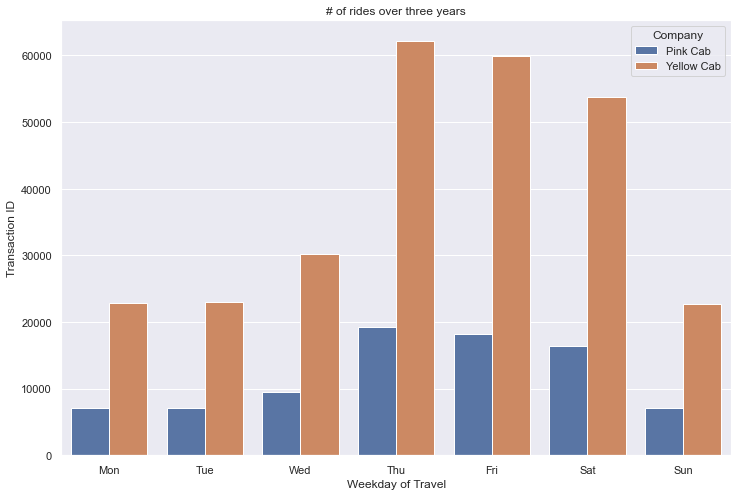

In [324]:
## count is # of unique rides (similar trend as profit: consistent)
cab_weekday_rides = pd.DataFrame(cab_weekday.groupby(['Weekday of Travel','Company'])['Transaction ID'].nunique())
cab_weekday_rides = cab_weekday_rides.reset_index()
cab_weekday_rides.head()

sns.barplot(data=cab_weekday_rides,x = 'Weekday of Travel',y = 'Transaction ID',hue='Company',order=weekday_dict.values()).set(title = '# of rides over three years')

[Text(0.5, 1.0, '# of customers over three years')]

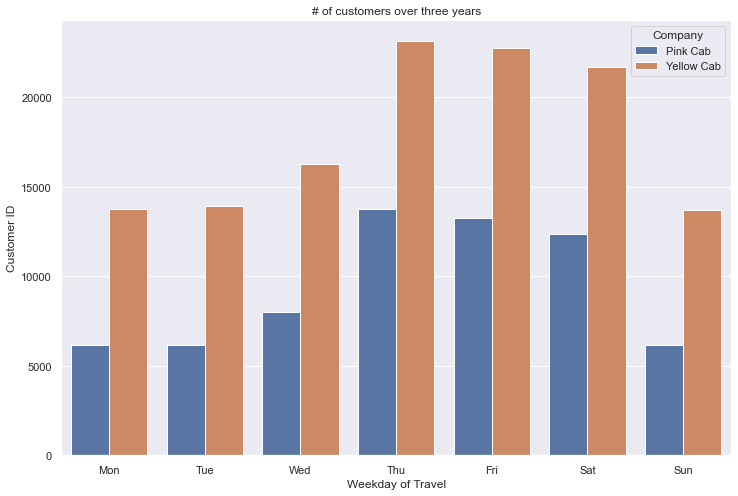

In [327]:
## customer preference over weekdays
cab_weekday_customers = pd.DataFrame(cab_weekday.groupby(['Weekday of Travel','Company'])['Customer ID'].nunique())
cab_weekday_customers = cab_weekday_customers.reset_index()
cab_weekday_customers.head()

sns.barplot(data=cab_weekday_customers,x = 'Weekday of Travel',y = 'Customer ID',hue='Company',order=weekday_dict.values()).set(title = '# of customers over three years')

## distance and # of customers

Most people's rides are between 5km and 40km, which 

In [328]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit,avg profit / km,Year of Travel,Month of Travel,Day of Travel,Weekday of Travel,season
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,814885,24701,29290,Card,Male,28,10813,57.315,1.882266,2016,1,7,3,Q1
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,814885,24701,27703,Card,Male,27,9237,23.666,0.826904,2016,1,5,1,Q1
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,814885,24701,28712,Cash,Male,53,11242,27.568,3.049558,2016,1,1,4,Q1
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,814885,24701,28020,Cash,Male,23,23327,25.798,0.777751,2016,1,6,2,Q1
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,814885,24701,27182,Card,Male,33,8536,16.844,1.929439,2016,1,2,5,Q1


In [329]:
cab['KM Travelled'].describe()

count    359392.000000
mean         22.567254
std          12.233526
min           1.900000
25%          12.000000
50%          22.440000
75%          32.960000
max          48.000000
Name: KM Travelled, dtype: float64

In [340]:
distance = np.arange(0,50,5)
distance_label = []
for i in np.arange(1,len(distance)):
    distance_label.append(str(distance[i-1])+'-'+str(distance[i]))
distance_label.append('>45')
distance_label

['0-5',
 '5-10',
 '10-15',
 '15-20',
 '20-25',
 '25-30',
 '30-35',
 '35-40',
 '40-45',
 '>45']

In [343]:
print(len(distance))
print(len(distance_label))

10
10


In [373]:
cab_distance = cab.copy()
cab_distance['distance_class'] = pd.cut(cab['KM Travelled'],bins=np.append(distance,100),labels=distance_label)
cab_distance

cab_distance_rides = pd.DataFrame(cab_distance.groupby(['distance_class','Company'])['Transaction ID'].sum())
cab_distance_rides = cab_distance_rides.reset_index()
cab_distance_rides.rename(columns={'Transaction ID':'# of rides'},inplace=True)
cab_distance_rides.head()

,distance_class,Company,# of rides
0,0-5,Pink Cab,71313463443
1,0-5,Yellow Cab,233060646186
2,5-10,Pink Cab,104117389912
3,5-10,Yellow Cab,334692388177
4,10-15,Pink Cab,103106783078


[Text(0.5, 1.0, '# of rides vs distance(km)')]

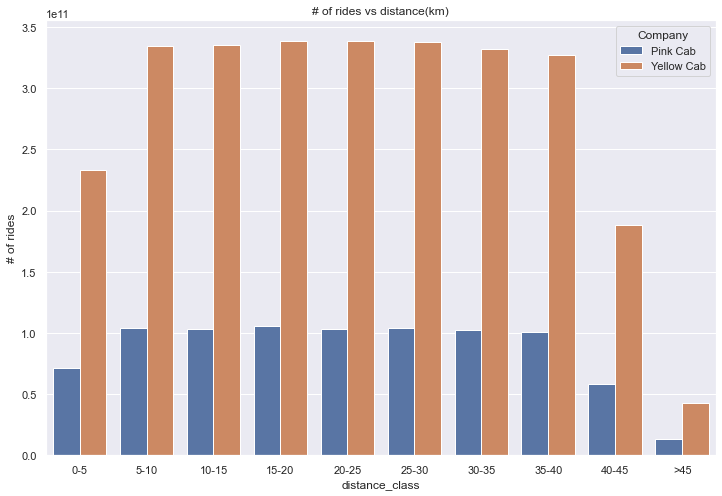

In [375]:
sns.barplot(data=cab_distance_rides,x = 'distance_class',y = '# of rides',hue='Company').set(title = '# of rides vs distance(km)')

## predictions on next year

The regression plot shows in the next year, the profit of yellow cab is till 5 times higher than the pink cab.

In [354]:
cab_month.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Datetime of Travel,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit,avg profit / km,Year of Travel,Month of Travel,Day of Travel,Weekday of Travel,season,months
0,10000011,6,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,814885,24701,29290,Card,Male,28,10813,57.315,1.882266,2016,1,7,3,Q1,1
1,10000012,4,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,814885,24701,27703,Card,Male,27,9237,23.666,0.826904,2016,1,5,1,Q1,1
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,814885,24701,28712,Cash,Male,53,11242,27.568,3.049558,2016,1,1,4,Q1,1
3,10000014,5,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,814885,24701,28020,Cash,Male,23,23327,25.798,0.777751,2016,1,6,2,Q1,1
4,10000015,1,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,814885,24701,27182,Card,Male,33,8536,16.844,1.929439,2016,1,2,5,Q1,1


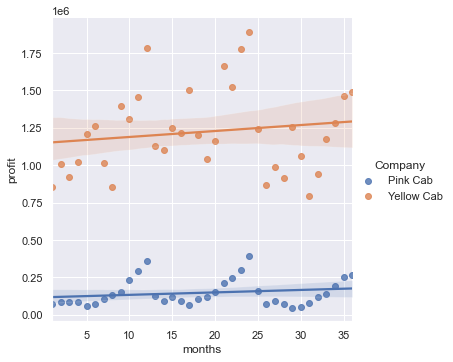

In [369]:
sns.lmplot(data = cab_month_profit,x = 'months',y = 'profit',hue = 'Company')

## Conclusion of investment: yellow cab!